<a href="https://colab.research.google.com/github/pboliveira/test/blob/main/cmems_SPM_vs_IBI_sal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#... to run xr.ffill()
!pip install bottleneck

In [ ]:
import numpy  as np
import xarray as xr
import matplotlib.pyplot as plt

# CMEMS

* https://marine.copernicus.eu/
https://data.marine.copernicus.eu/product/
* https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_PHY_005_001/description
  - cmems_mod_ibi_phy_anfc_0.027deg-2D_PT1H-m
```
  (... hourly means of surface fields for variables
   such as Sea Surface Height, Mix Layer Depth,
   Surface Temperature and Currents, together with
   Barotropic Velocities are delivered...)
```
  - cmems_mod_ibi_phy_anfc_0.027deg-3D_P1D-m

* https://data.marine.copernicus.eu/product/SST_MED_SST_L4_NRT_OBSERVATIONS_010_004/description
* https://data.marine.copernicus.eu/register


## Download dos ficheiros

In [ ]:
!python -m pip install motuclient==1.8.4 --no-cache-dir

  Preparing metadata (setup.py) ... done
  Created wheel for motuclient: filename=motuclient-1.8.4-py3-none-any.whl size=32873 sha256=243e359a983be6694dcc1e709447c5f39fe59c18a5d96a10e798e8995d1e80eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-645wp9kt/wheels/46/74/d1/ee3216f52d83212f10a0a5f5b94f3d99cf3d29b8ecf09c60b6
Successfully built motuclient


In [ ]:
!python -m motuclient --help

In [ ]:
import getpass

USERNAME = input('Enter your username: ')
PASSWORD = getpass.getpass('Enter your password: ')

Enter your username: poliveira
Enter your password: ··········


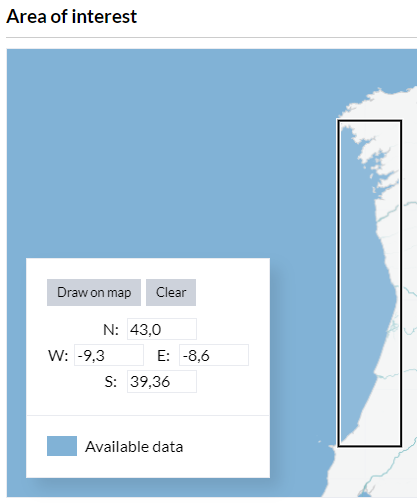

### [OCEANCOLOUR_ATL_BGC_L3_MY_009_113/download](https://data.marine.copernicus.eu/product/OCEANCOLOUR_ATL_BGC_L3_MY_009_113/download?dataset=cmems_obs-oc_atl_bgc-transp_my_l3-multi-1km_P1D)

In [ ]:
!apt install nco

In [ ]:
outdir = '/content/drive/MyDrive/DiadSea/data'
outdir = '/content'

yrngs=['1998-1999','2000-2004','2005-2009','2010-2014','2015-2019','2020-2022']
for yrng in yrngs:
  outf = 'oc_atl_bgc-transp_my_l3-multi-1km_P1D_'+yrng+'.nc'
  datemin = yrng.split('-')[0]+'-01-01 00:00:00'
  datemax = yrng.split('-')[1]+'-12-31 23:59:59'
  print(outf,'...',datemin,datemax)

  !python -m motuclient\
  --motu https://my.cmems-du.eu/motu-web/Motu\
  --service-id OCEANCOLOUR_ATL_BGC_L3_MY_009_113-TDS\
  --product-id cmems_obs-oc_atl_bgc-transp_my_l3-multi-1km_P1D\
  --longitude-min -9.3 --longitude-max -8.6\
  --latitude-min 39.36  --latitude-max 43.0\
  --date-min "$datemin" --date-max "$datemax"\
  --variable KD490 --variable KD490_uncertainty --variable SPM --variable SPM_uncertainty\
  --variable ZSD --variable ZSD_uncertainty --variable flags \
  --out-dir $outdir --out-name $outf\
  --user $USERNAME --pwd $PASSWORD

  print('... mk_rec_dmn...')
  !ncks --mk_rec_dmn time $outf xx.nc; mv xx.nc $outf

In [ ]:
!ncrcat oc_atl_bgc-transp_my_l3-multi-1km_P1D_*.nc /content/drive/MyDrive/DiadSea/data/oc_atl_bgc-transp_my_l3-multi-1km_P1D_1998-2022.nc
!ncks -M /content/drive/MyDrive/DiadSea/data/oc_atl_bgc-transp_my_l3-multi-1km_P1D_1998-2022.nc


[IBI_MULTIYEAR_PHY_005_002](https://data.marine.copernicus.eu/product/IBI_MULTIYEAR_PHY_005_002/download?dataset=cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m_202012)

### [IBI_MULTIYEAR_PHY_005_002-TDS](https://data.marine.copernicus.eu/product/IBI_MULTIYEAR_PHY_005_002/download?dataset=cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m_202012)

- 2023-09-28 - time range 1993-2021

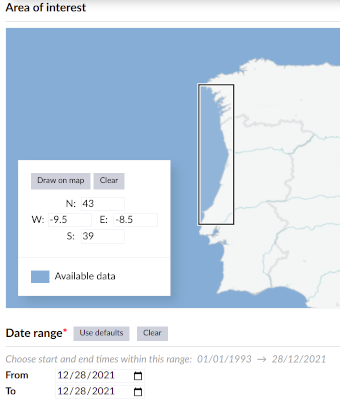

In [ ]:
outdir = '/content/drive/MyDrive/DiadSea/data'
outf = 'ibi_phy_my_0.083deg-3D_P1D_1993-2021.nc'

!python -m motuclient\
 --motu https://my.cmems-du.eu/motu-web/Motu\
 --service-id IBI_MULTIYEAR_PHY_005_002-TDS\
 --product-id cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m\
 --longitude-min -9.5 --longitude-max -8.5\
 --latitude-min  39.0 --latitude-max  43.0\
 --date-min "1993-01-01 00:00:00" --date-max "2021-12-31 23:59:59"\
 --depth-min 0.0 --depth-max 15.0\
 --variable so --variable thetao\
 --out-dir $outdir --out-name $outf\
 --user $USERNAME --pwd $PASSWORD

#### Download repartido por blocos de anos...

In [ ]:
outdir = '/content/drive/MyDrive/DiadSea/data'
outf = 'ibi_phy_my_0.083deg-3D_P1D_1993-1998.nc'

!python -m motuclient\
 --motu https://my.cmems-du.eu/motu-web/Motu\
 --service-id IBI_MULTIYEAR_PHY_005_002-TDS\
 --product-id cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m\
 --longitude-min -9.3 --longitude-max -8.6\
 --latitude-min 39.36  --latitude-max 43.0\
 --date-min "1993-01-01 00:00:00" --date-max "1998-12-31 23:59:59"\
 --depth-min 0.0 --depth-max 15.0\
 --variable so --variable thetao\
 --out-dir $outdir --out-name $outf\
 --user $USERNAME --pwd $PASSWORD

outdir = '/content/drive/MyDrive/DiadSea/data'
outf = 'ibi_phy_my_0.083deg-3D_P1D_1999-2005.nc'

!python -m motuclient\
 --motu https://my.cmems-du.eu/motu-web/Motu\
 --service-id IBI_MULTIYEAR_PHY_005_002-TDS\
 --product-id cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m\
 --longitude-min -9.3 --longitude-max -8.6\
 --latitude-min 39.36  --latitude-max 43.0\
 --date-min "1999-01-01 00:00:00" --date-max "2005-12-31 23:59:59"\
 --depth-min 0.0 --depth-max 15.0\
 --variable so --variable thetao\
 --out-dir $outdir --out-name $outf\
 --user $USERNAME --pwd $PASSWORD

outdir = '/content/drive/MyDrive/DiadSea/data'
outf = 'ibi_phy_my_0.083deg-3D_P1D_2006-2020.nc'

!python -m motuclient\
 --motu https://my.cmems-du.eu/motu-web/Motu\
 --service-id IBI_MULTIYEAR_PHY_005_002-TDS\
 --product-id cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m\
 --longitude-min -9.3 --longitude-max -8.6\
 --latitude-min 39.36  --latitude-max 43.0\
 --date-min "2006-01-01 00:00:00" --date-max "2020-12-31 23:59:59"\
 --depth-min 0.0 --depth-max 15.0\
 --variable so --variable thetao\
 --out-dir $outdir --out-name $outf\
 --user $USERNAME --pwd $PASSWORD

In [ ]:
!fs=`\ls -1 /content/drive/MyDrive/DiadSea/data/ibi_phy_my_0.083deg-3D_P1D_*nc`; for f in $fs; do f0=`echo $f | cut -d\/ -f7`; echo $f0; ncks --mk_rec_dmn time $f $f0; done
!ncrcat ibi_phy_my_0.083deg-3D_P1D_*.nc /content/drive/MyDrive/DiadSea/data/ibi_phy_my_0.083deg-3D_P1D_1993-2022.nc
!ncks -M /content/drive/MyDrive/DiadSea/data/ibi_phy_my_0.083deg-3D_P1D_1993-2022.nc

### [IBI_ANALYSISFORECAST_PHY_005_001](https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_PHY_005_001/download?dataset=cmems_mod_ibi_phy_anfc_0.027deg-3D_P1D-m_202211)

* Date range in 2023-09-28...

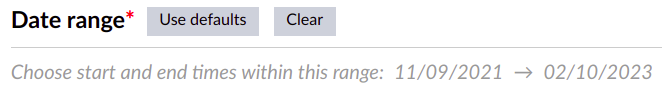

In [ ]:
outdir = '/content/drive/MyDrive/DiadSea/data'
outf = 'ibi_phy_anfc_0.027deg-3D_P1D_2021-2022.nc'

!python -m motuclient\
 --motu https://nrt.cmems-du.eu/motu-web/Motu\
 --service-id IBI_ANALYSISFORECAST_PHY_005_001-TDS\
 --product-id cmems_mod_ibi_phy_anfc_0.027deg-3D_P1D-m\
 --longitude-min -9.5 --longitude-max -8.5\
 --latitude-min  39.0 --latitude-max  43.0\
 --date-min "2021-01-01 00:00:00" --date-max "2022-12-31 23:59:59"\
 --depth-min 0.0 --depth-max 15.0\
 --variable so --variable thetao\
 --out-dir $outdir --out-name $outf\
 --user $USERNAME --pwd $PASSWORD


### Distância à costa

http://www.pacioos.hawaii.edu/metadata/dist2coast_1deg.html

https://pae-paha.pacioos.hawaii.edu/thredds/ncss/dist2coast_1deg/dataset.html

In [ ]:
!wget -O /content/drive/MyDrive/DiadSea/data/dist2coast_35-45N.nc 'https://pae-paha.pacioos.hawaii.edu/thredds/ncss/dist2coast_1deg?var=dist&north=50&west=-10&east=1&south=35&disableProjSubset=on&horizStride=1'

--2023-09-28 09:40:27--  https://pae-paha.pacioos.hawaii.edu/thredds/ncss/dist2coast_1deg?var=dist&north=50&west=-10&east=1&south=35&disableProjSubset=on&horizStride=1
Resolving pae-paha.pacioos.hawaii.edu (pae-paha.pacioos.hawaii.edu)... 128.171.219.10
Connecting to pae-paha.pacioos.hawaii.edu (pae-paha.pacioos.hawaii.edu)|128.171.219.10|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 3321236 (3.2M) [application/x-netcdf]
Saving to: ‘/content/drive/MyDrive/DiadSea/data/dist2coast_35-45N.nc’

/content/drive/MyDr 100%[===================>]   3.17M   609KB/s    in 5.5s    

2023-09-28 09:40:37 (584 KB/s) - ‘/content/drive/MyDrive/DiadSea/data/dist2coast_35-45N.nc’ saved [3321236/3321236]



## Gráficos

In [ ]:
bat = xr.open_dataset('/content/drive/MyDrive/DiadSea/data/gebco_2021_35-45N_15-5W.nc').sel(
    lat=slice(39,44),
    lon=slice(-9.5,-8.5)
)

bat = bat.rename({'Height':'z'}).z
bat

<xarray.DataArray 'z' (lat: 1200, lon: 240)>
[288000 values with dtype=int16]
Coordinates:
  * lat      (lat) float64 39.0 39.01 39.01 39.01 ... 43.99 43.99 43.99 44.0
  * lon      (lon) float64 -9.498 -9.494 -9.49 -9.485 ... -8.51 -8.506 -8.502
Attributes:
    standard_name:       height_above_mean_sea_level
    long_name:           Elevation relative to sea level
    units:               m
    grid_mapping:        crs
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

In [ ]:
!ls -l /content/drive/MyDrive/DiadSea/data

total 4889518
-rw------- 1 root root    3321236 Sep 28 09:40 dist2coast_35-45N.nc
-rw------- 1 root root   39458996 Sep 28 09:09 ibi_phy_my_0.083deg-3D_P1D_1993-1998.nc
-rw------- 1 root root  269895928 Sep 28 09:37 ibi_phy_my_0.083deg-3D_P1D_1993-2021.nc
-rw------- 1 root root  387968516 Sep 28 09:40 ibi_phy_my_0.083deg-3D_P1D_1993-2022.nc
-rw------- 1 root root   46049924 Sep 28 09:13 ibi_phy_my_0.083deg-3D_P1D_1999-2005.nc
-rw------- 1 root root   98669300 Sep 28 09:21 ibi_phy_my_0.083deg-3D_P1D_2006-2020.nc
-rw------- 1 root root   33759472 Sep 27 15:04 ibi_phy_my_0.083deg-3D_P1D_2020-2022.nc
-rw------- 1 root root       5771 Sep 28 09:39 ncrcat.ipynb
-rw------- 1 root root 4127734196 Sep 28 09:28 oc_atl_bgc-transp_my_l3-multi-1km_P1D_1998-2022.nc


### Distance to coast

In [ ]:
d2c = xr.open_dataset('/content/drive/MyDrive/DiadSea/data/dist2coast_35-45N.nc').dist
d2c_5km  = xr.where((d2c <  5) & (d2c > 0),d2c,np.nan)
d2c_10km = xr.where((d2c < 10) & (d2c > 0),d2c,np.nan)
d2c_15km = xr.where((d2c < 15) & (d2c > 0),d2c,np.nan)
d2c

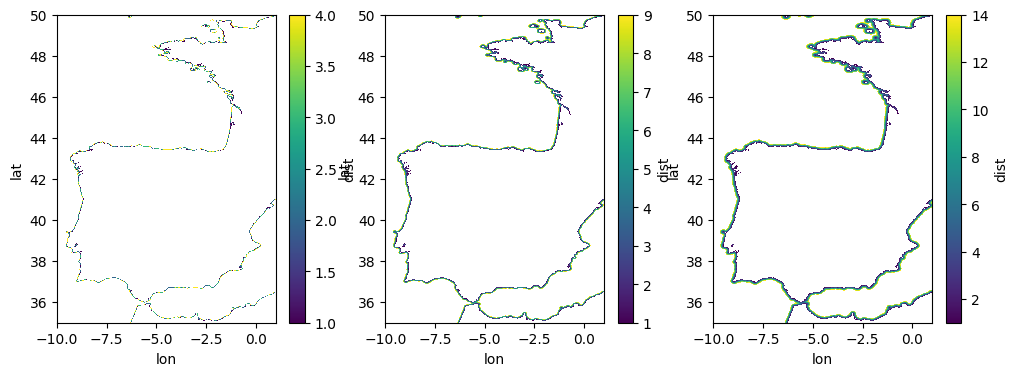

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
d2c_5km.plot( ax=ax[0])
d2c_10km.plot(ax=ax[1])
d2c_15km.plot(ax=ax[2])

### Satellite SPM

In [ ]:
transp = xr.open_dataset('/content/drive/MyDrive/DiadSea/data/oc_atl_bgc-transp_my_l3-multi-1km_P1D_1998-2022.nc')
transp

<xarray.Dataset>
Dimensions:            (time: 9101, lat: 351, lon: 78)
Coordinates:
  * lat                (lat) float32 43.01 42.99 42.98 ... 39.38 39.37 39.36
  * lon                (lon) float32 -9.401 -9.391 -9.38 ... -8.62 -8.609 -8.599
  * time               (time) datetime64[ns] 1998-01-01 ... 2022-12-31
Data variables:
    KD490              (time, lat, lon) float32 ...
    KD490_uncertainty  (time, lat, lon) float32 ...
    SPM                (time, lat, lon) float32 ...
    SPM_uncertainty    (time, lat, lon) float32 ...
    ZSD                (time, lat, lon) float32 ...
    ZSD_uncertainty    (time, lat, lon) float32 ...
    flags              (time, lat, lon) int8 ...
Attributes: (12/93)
    FROM_ORIGINAL_FILE__lon_step:                     0.010416667
    keywords:                                         EARTH SCIENCE > OCEANS ...
    cmems_product_id:                                 OCEANCOLOUR_ATL_BGC_L3_...
    FROM_ORIGINAL_FILE__lat_step:                     0.010416667
    grid_mapping:                                     Equirectangular
    title:                                            cmems_obs-oc_atl_bgc-tr...
    ...                                               ...
    geospatial_vertical_positive:                     up
    date_created:                                     2023-09-27T05:52:48Z
    nb_valid_bins:                                    10034310
    pct_valid_bins:                                   40.117624086526654
    _CoordSysBuilder:                                 ucar.nc2.dataset.conv.C...
    NCO:                                              netCDF Operators versio...

In [ ]:
transp

<xarray.Dataset>
Dimensions:            (time: 9101, lat: 351, lon: 78)
Coordinates:
  * lat                (lat) float32 43.01 42.99 42.98 ... 39.38 39.37 39.36
  * lon                (lon) float32 -9.401 -9.391 -9.38 ... -8.62 -8.609 -8.599
  * time               (time) datetime64[ns] 1998-01-01 ... 2022-12-31
Data variables:
    KD490              (time, lat, lon) float32 ...
    KD490_uncertainty  (time, lat, lon) float32 ...
    SPM                (time, lat, lon) float32 ...
    SPM_uncertainty    (time, lat, lon) float32 ...
    ZSD                (time, lat, lon) float32 ...
    ZSD_uncertainty    (time, lat, lon) float32 ...
    flags              (time, lat, lon) int8 ...
Attributes: (12/93)
    FROM_ORIGINAL_FILE__lon_step:                     0.010416667
    keywords:                                         EARTH SCIENCE > OCEANS ...
    cmems_product_id:                                 OCEANCOLOUR_ATL_BGC_L3_...
    FROM_ORIGINAL_FILE__lat_step:                     0.010416667
    grid_mapping:                                     Equirectangular
    title:                                            cmems_obs-oc_atl_bgc-tr...
    ...                                               ...
    geospatial_vertical_positive:                     up
    date_created:                                     2023-09-27T05:52:48Z
    nb_valid_bins:                                    10034310
    pct_valid_bins:                                   40.117624086526654
    _CoordSysBuilder:                                 ucar.nc2.dataset.conv.C...
    NCO:                                              netCDF Operators versio...

#### if the "non-unique" or "index must be monotonic"" error occurs..

* keep only increasing times...

https://stackoverflow.com/questions/51058379/drop-duplicate-times-in-xarray

In [ ]:
_, index = np.unique(transp['time'], return_index=True)
transp = transp.isel(time=index)
transp

In [ ]:
transp.time.plot(marker='.')

#### Compute monthly means

In [ ]:
spm_m = transp.SPM.resample(time="M").mean()
spm_m

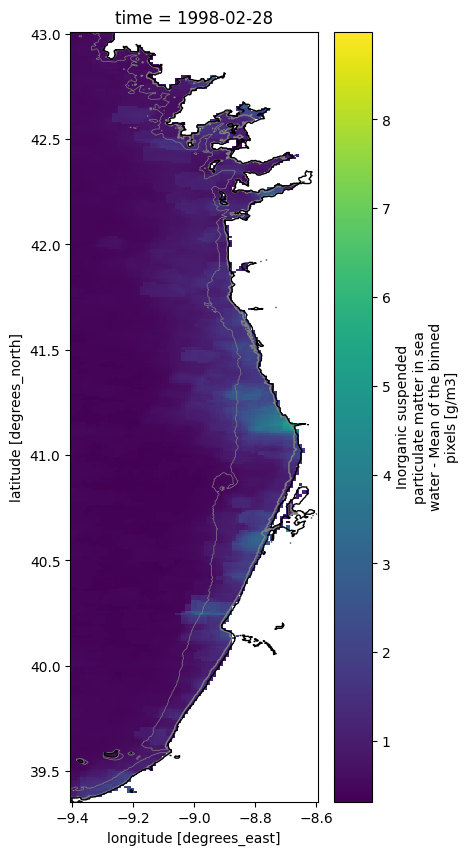

In [ ]:
fig,ax = plt.subplots(figsize=(4,10))

spm_m.isel(time=1).plot(ax=ax)
ax.contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

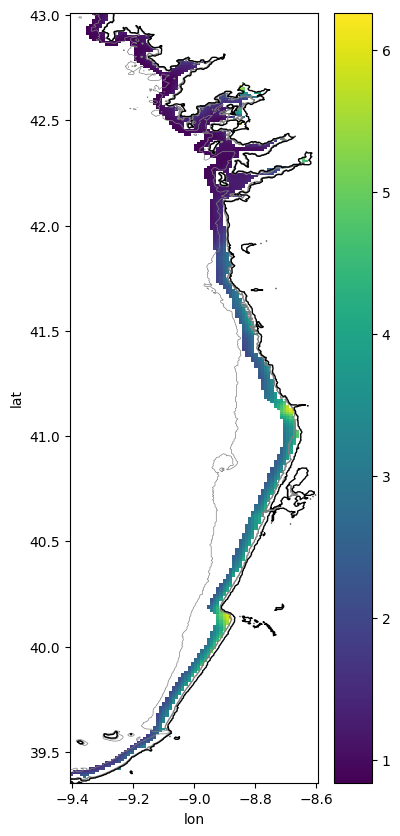

In [ ]:
spm_m_5km = xr.where(d2c_5km.interp_like(spm_m)>0,spm_m,np.nan)
spm_m_5km.mean('time').plot(figsize=(4,10))
plt.contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

[Text(0, 39.0, ''),
 Text(0, 39.5, ''),
 Text(0, 40.0, ''),
 Text(0, 40.5, ''),
 Text(0, 41.0, ''),
 Text(0, 41.5, ''),
 Text(0, 42.0, ''),
 Text(0, 42.5, ''),
 Text(0, 43.0, ''),
 Text(0, 43.5, '')]

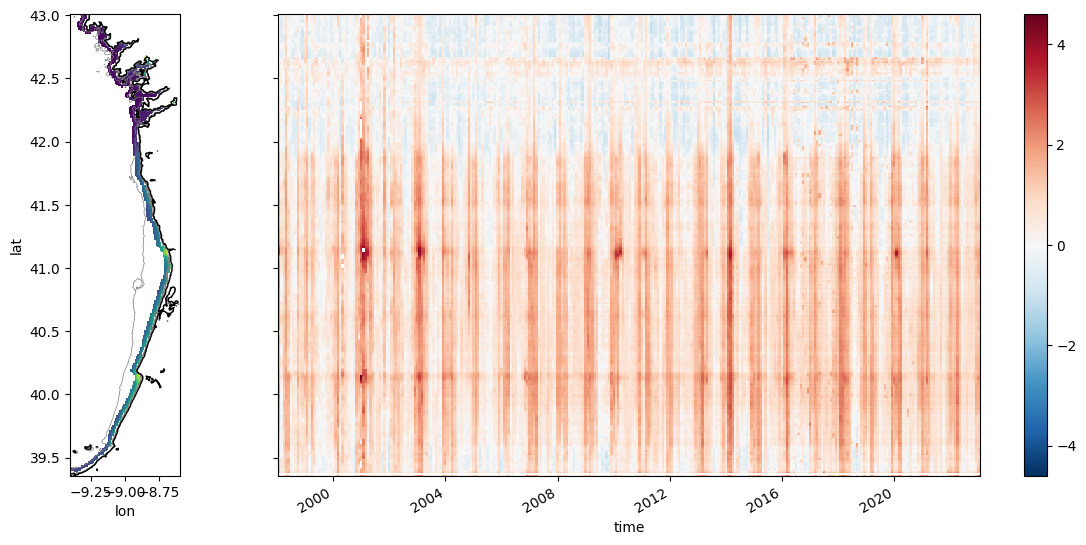

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6), width_ratios=[1, 8])

spm_m_5km = xr.where(d2c_5km.interp_like(spm_m)>0,spm_m,np.nan)
spm_m_5km.mean('time').plot(ax=ax[0],add_colorbar=False)
ax[0].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

np.log(spm_m_5km.mean('lon' )).plot(ax=ax[1])

ax[1].set_ylabel(''); ax[1].axes.yaxis.set_ticklabels([])

### Model salinity

In [ ]:
import numpy  as np
import xarray as xr
import matplotlib.pyplot as plt



In [ ]:
!ls -l /content/drive/MyDrive/DiadSea/data

In [ ]:
ncf = '/content/drive/MyDrive/DiadSea/data/ibi_phy_my_0.083deg-3D_P1D_1993-2021.nc'
ibi_1d = xr.open_dataset(ncf).rename({'latitude':'lat','longitude':'lon'})
ibi_1d

In [ ]:
sal_m = ibi_1d.so.resample(time="M").mean()

sal_m_5km  = xr.where(d2c_5km.interp_like( sal_m)>0,sal_m,np.nan)
sal_m_10km = xr.where(d2c_10km.interp_like(sal_m)>0,sal_m,np.nan)
sal_m_15km = xr.where(d2c_15km.interp_like(sal_m)>0,sal_m,np.nan)

[Text(0, 38.5, ''),
 Text(0, 39.0, ''),
 Text(0, 39.5, ''),
 Text(0, 40.0, ''),
 Text(0, 40.5, ''),
 Text(0, 41.0, ''),
 Text(0, 41.5, ''),
 Text(0, 42.0, ''),
 Text(0, 42.5, ''),
 Text(0, 43.0, ''),
 Text(0, 43.5, '')]

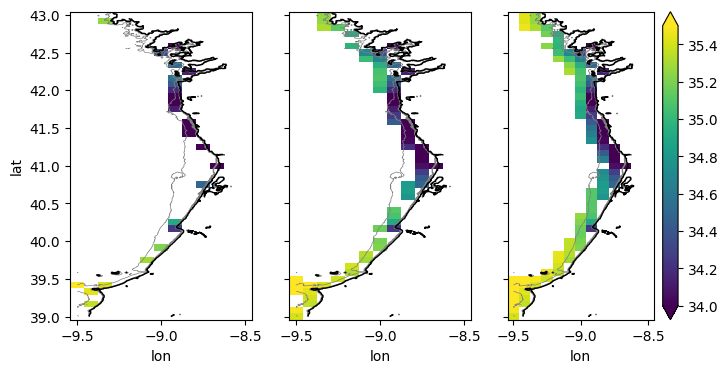

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(8,4))
sal_m_5km.sel( depth=slice(0,5.)).mean('depth').mean('time').plot(ax=ax[0],vmin=34,vmax=35.5,add_colorbar=False)
sal_m_10km.sel(depth=slice(0,5.)).mean('depth').mean('time').plot(ax=ax[1],vmin=34,vmax=35.5,add_colorbar=False)
sal_m_15km.sel(depth=slice(0,5.)).mean('depth').mean('time').plot(ax=ax[2],vmin=34,vmax=35.5)

for i in range(0,len(ax)):
  ax[i].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])


ax[1].set_ylabel(''); ax[2].set_ylabel('')
ax[1].axes.yaxis.set_ticklabels([]); ax[2].axes.yaxis.set_ticklabels([])

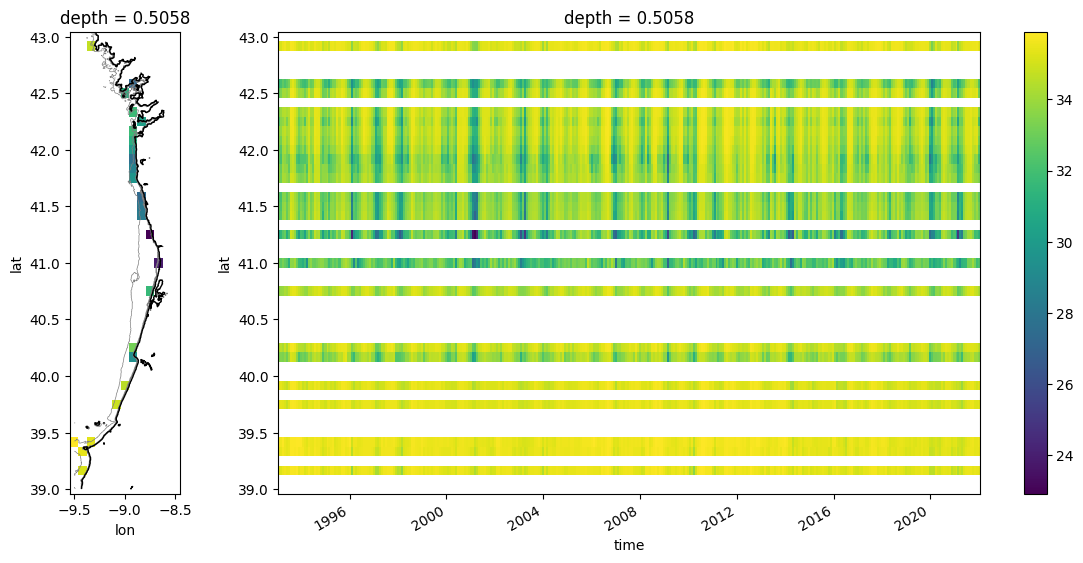

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6), width_ratios=[1, 8])

sal_m_5km.isel(depth=0).mean('time').plot(ax=ax[0],add_colorbar=False)
ax[0].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

sal_m_5km.isel(depth=0).mean('lon' ).plot(ax=ax[1])

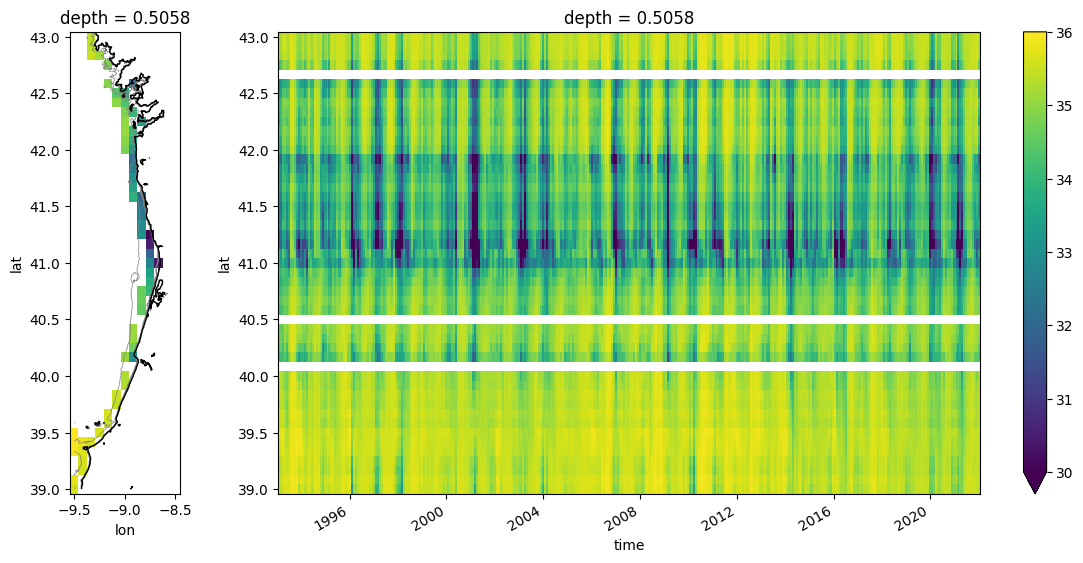

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6), width_ratios=[1, 8])

sal_m_10km.isel(depth=0).mean('time').plot(ax=ax[0],add_colorbar=False)
ax[0].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

sal_m_10km.isel(depth=0).mean('lon' ).plot(ax=ax[1],vmin=30,vmax=36)

[Text(0, 38.5, ''),
 Text(0, 39.0, ''),
 Text(0, 39.5, ''),
 Text(0, 40.0, ''),
 Text(0, 40.5, ''),
 Text(0, 41.0, ''),
 Text(0, 41.5, ''),
 Text(0, 42.0, ''),
 Text(0, 42.5, ''),
 Text(0, 43.0, ''),
 Text(0, 43.5, '')]

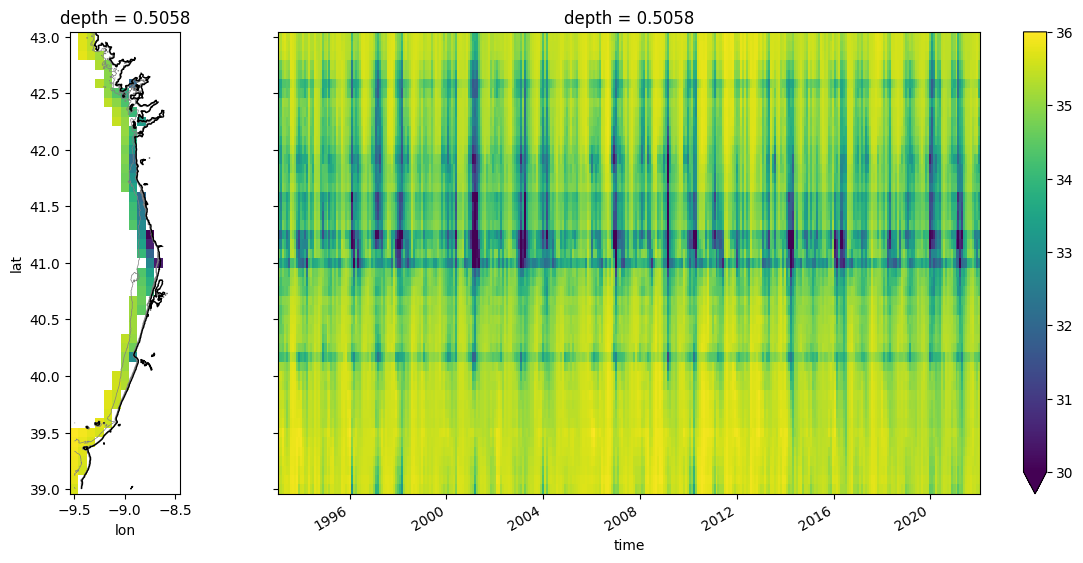

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6), width_ratios=[1, 8])

sal_m_15km.isel(depth=0).mean('time').plot(ax=ax[0],add_colorbar=False)
ax[0].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

sal_m_15km.isel(depth=0).mean('lon' ).plot(ax=ax[1],vmin=30,vmax=36)

ax[1].set_ylabel(''); ax[1].axes.yaxis.set_ticklabels([])

#### Daily analysis (2021-2022)

##### Model salinity

In [ ]:
!ls -l /content/drive/MyDrive/DiadSea/data

total 5001385
-rw------- 1 root root    3321236 Sep 28 09:40 dist2coast_35-45N.nc
-rw------- 1 root root   11563040 Sep 28 11:09 gebco_2021_35-45N_15-5W.nc
-rw------- 1 root root  102372084 Sep 28 12:29 ibi_phy_anfc_0.027deg-3D_P1D_2021-2022.nc
-rw------- 1 root root  269895928 Sep 28 09:37 ibi_phy_my_0.083deg-3D_P1D_1993-2021.nc
-rw------- 1 root root      19889 Sep 28 11:10 motu_and_ncrcat.ipynb
-rw------- 1 root root 4734244548 Sep 28 11:10 oc_atl_bgc-transp_my_l3-multi-1km_P1D_1998-2022.nc


In [ ]:
ncf = '/content/drive/MyDrive/DiadSea/data/ibi_phy_anfc_0.027deg-3D_P1D_2021-2022.nc'
ibi_hr = xr.open_dataset(ncf).rename({'latitude':'lat','longitude':'lon'})
ibi_hr

<xarray.Dataset>
Dimensions:  (depth: 10, lat: 145, time: 477, lon: 37)
Coordinates:
  * depth    (depth) float32 0.494 1.541 2.646 3.819 ... 7.93 9.573 11.4 13.47
  * lat      (lat) float32 39.0 39.03 39.06 39.08 ... 42.92 42.94 42.97 43.0
  * time     (time) datetime64[ns] 2021-09-11T12:00:00 ... 2022-12-31T12:00:00
  * lon      (lon) float32 -9.5 -9.472 -9.444 -9.417 ... -8.556 -8.528 -8.5
Data variables:
    thetao   (time, depth, lat, lon) float32 ...
    so       (time, depth, lat, lon) float32 ...
Attributes: (12/24)
    Conventions:                        CF-1.0
    title:                              Ocean 3D daily mean fields for the Ib...
    source:                             NEMO3.6
    domain_name:                        IBI36
    FROM_ORIGINAL_FILE__field_type:     mean
    field_date:                         20231002
    ...                                 ...
    institution:                        Nologin (Spain)
    references:                         http://marine.copernicus.eu/
    contact:                            mailto: servicedesk.cmems@mercator-oc...
    _CoordSysBuilder:                   ucar.nc2.dataset.conv.CF1Convention
    comment:                            
    history:                            Data extracted from dataset http://lo...

In [ ]:
#sal_m = ibi_1d.so.resample(time="M").mean()

sal = ibi_hr.so

sal_5km  = xr.where(d2c_5km.interp_like( sal)>0,sal,np.nan)
sal_10km = xr.where(d2c_10km.interp_like(sal)>0,sal,np.nan)
sal_15km = xr.where(d2c_15km.interp_like(sal)>0,sal,np.nan)

[Text(0, 38.5, ''),
 Text(0, 39.0, ''),
 Text(0, 39.5, ''),
 Text(0, 40.0, ''),
 Text(0, 40.5, ''),
 Text(0, 41.0, ''),
 Text(0, 41.5, ''),
 Text(0, 42.0, ''),
 Text(0, 42.5, ''),
 Text(0, 43.0, ''),
 Text(0, 43.5, '')]

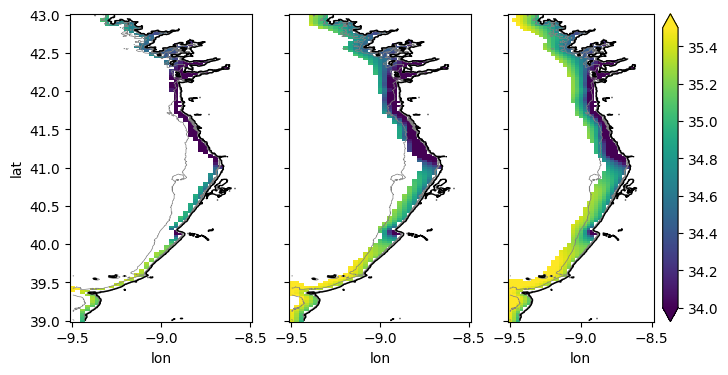

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(8,4))
sal_5km.sel( depth=slice(0,5.)).mean('depth').mean('time').plot(ax=ax[0],vmin=34,vmax=35.5,add_colorbar=False)
sal_10km.sel(depth=slice(0,5.)).mean('depth').mean('time').plot(ax=ax[1],vmin=34,vmax=35.5,add_colorbar=False)
sal_15km.sel(depth=slice(0,5.)).mean('depth').mean('time').plot(ax=ax[2],vmin=34,vmax=35.5)

for i in range(0,len(ax)):
  ax[i].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])


ax[1].set_ylabel(''); ax[2].set_ylabel('')
ax[1].axes.yaxis.set_ticklabels([]); ax[2].axes.yaxis.set_ticklabels([])

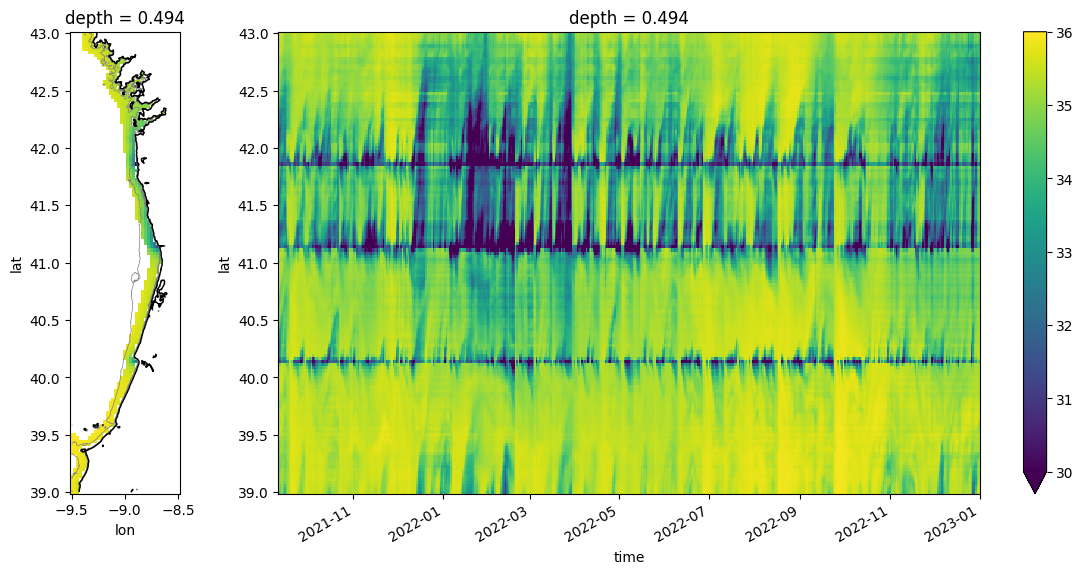

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6), width_ratios=[1, 8])

sal_10km.isel(depth=0).mean('time').plot(ax=ax[0],add_colorbar=False)
ax[0].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

sal_10km.isel(depth=0).mean('lon' ).plot(ax=ax[1],vmin=30,vmax=36)

##### Satellite SPM

In [ ]:
spm_d10km.mean('time').plot()

[Text(0, 39.0, ''),
 Text(0, 39.5, ''),
 Text(0, 40.0, ''),
 Text(0, 40.5, ''),
 Text(0, 41.0, ''),
 Text(0, 41.5, ''),
 Text(0, 42.0, ''),
 Text(0, 42.5, ''),
 Text(0, 43.0, ''),
 Text(0, 43.5, '')]

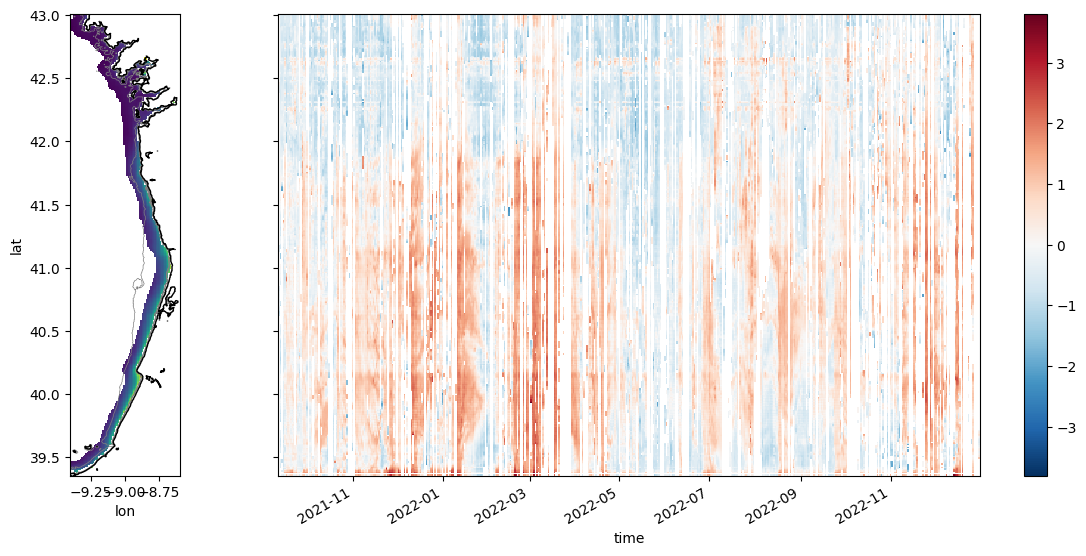

In [ ]:
spm_d = transp.SPM.sel(time=slice(sal.time[0],sal.time[-1]))
spm_d10km = xr.where(d2c_10km.interp_like(spm_d)>0,spm_d,np.nan)

fig,ax = plt.subplots(1,2,figsize=(14,6), width_ratios=[1, 8])
spm_d10km.mean('time').plot(ax=ax[0],add_colorbar=False)
ax[0].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

np.log(spm_d10km.mean('lon' )).plot(ax=ax[1])

ax[1].set_ylabel(''); ax[1].axes.yaxis.set_ticklabels([])

##### Zoom winter 2022


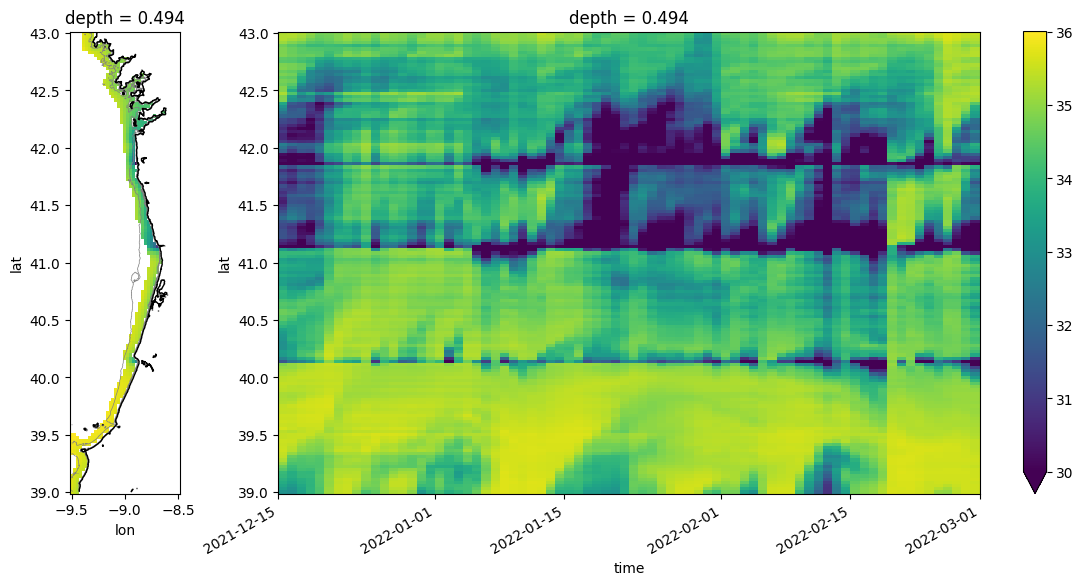

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6), width_ratios=[1, 8])

sal_10km.isel(depth=0).sel(time=slice('2021-12-15','2022-02-28')).mean('time').plot(ax=ax[0],add_colorbar=False)
ax[0].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

sal_10km.sel(time=slice('2021-12-15','2022-02-28')).isel(depth=0).mean('lon' ).plot(ax=ax[1],vmin=30,vmax=36)

[Text(0, 39.0, ''),
 Text(0, 39.5, ''),
 Text(0, 40.0, ''),
 Text(0, 40.5, ''),
 Text(0, 41.0, ''),
 Text(0, 41.5, ''),
 Text(0, 42.0, ''),
 Text(0, 42.5, ''),
 Text(0, 43.0, ''),
 Text(0, 43.5, '')]

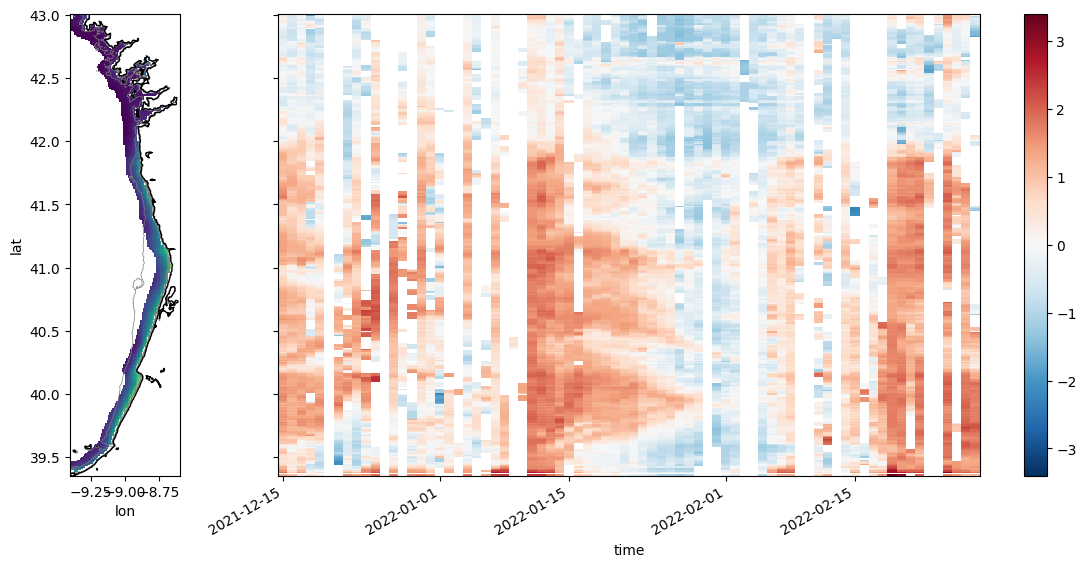

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(14,6), width_ratios=[1, 8])

spm_d10km.sel(time=slice('2021-12-15','2022-02-28')).mean('time').plot(ax=ax[0],add_colorbar=False)
ax[0].contour(bat.lon,bat.lat,bat, levels=[-50, -10, 0],colors=['gray','gray','black'],linewidths=[0.5, 1, 1])

np.log(spm_d10km.sel(time=slice('2021-12-15','2022-02-28')).mean('lon' )).plot(ax=ax[1])

ax[1].set_ylabel(''); ax[1].axes.yaxis.set_ticklabels([])

# Other stuff

## Mapas com projecção cartográfica

In [ ]:
!pip install cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

In [ ]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf #eature

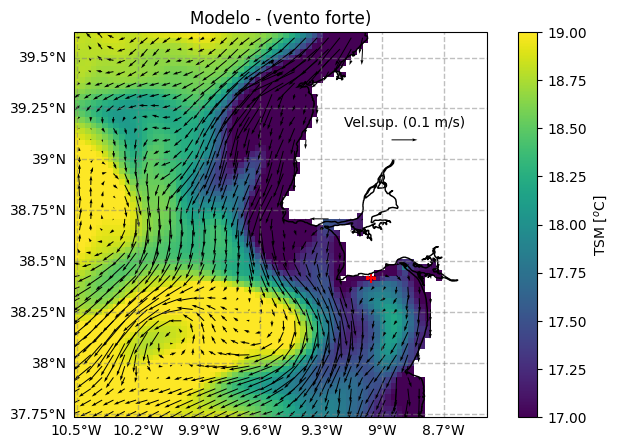

In [ ]:
ds2plt = ibi_vc; tit = 'vento fraco'
ds2plt = ibi_vf; tit = 'vento forte'

da = ds2plt.thetao;
dc = ds2plt.coarsen(lat=2,boundary="trim").mean().coarsen(lon=2,boundary="trim").mean()

fig = plt.figure(figsize=(10, 5)) # Define the figure and specify size
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree()) # Specify plot area & projection
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
gl.top_labels = False
gl.right_labels = False
ax.set_title(f'Modelo - ({tit})',fontsize=12) # (f'Sea surface temperature,{str(da.time[0].values)[:-13]}') # Set figure title
coast = cf.GSHHSFeature(scale='f')                           #... it takes time to download and make the first plot...
ax.add_feature(coast)
# ax.coastlines(color='black') # Add coastlines ... a bit too coarse...
im = plt.pcolormesh(da.lon, da.lat, da[:,:],vmin=17,vmax=19) #,cmap='jet') # Plot the data
plt.scatter(pna1_proxy_lon,pna1_proxy_lat,marker='+',color='red',s=60)
q = plt.quiver(x=dc.lon, y=dc.lat, u=dc.uo, v=dc.vo,scale=4)
ax.quiverkey(q, X=0.8, Y=0.72, U=0.25,label='Vel.sup. (0.1 m/s)', labelpos='N')
cbar = plt.colorbar(im,fraction=0.045, pad=0.04) # Specify the colourbar
cbar.set_label('TSM [$^{o}$C]') # Define the colourbar label

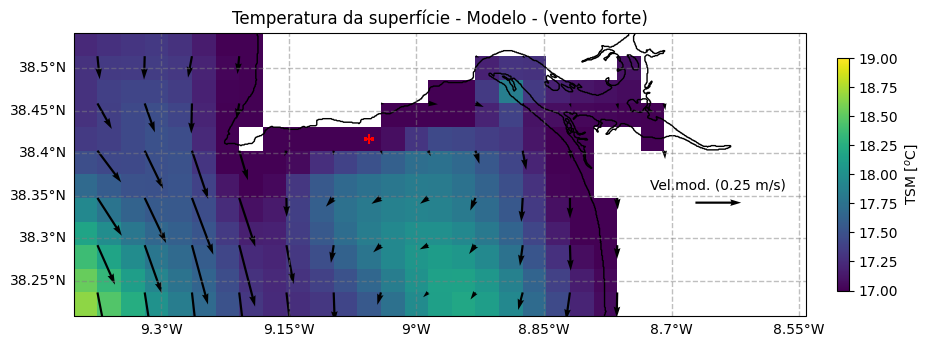

In [ ]:
ibi_vcx = ibi_1d.sel(lon=slice(-9.4,-8.55), lat=slice(38.2,38.55),time=slice(ti_vc,tf_vc),depth=slice(0,3)).mean('time').mean('depth')
ibi_vfx = ibi_1d.sel(lon=slice(-9.4,-8.55), lat=slice(38.2,38.55),time=slice(ti_vf,tf_vf),depth=slice(0,3)).mean('time').mean('depth')

ibi_vcx = ibi_1h.sel(lon=slice(-9.4,-8.55), lat=slice(38.2,38.55),time=slice(ti_vc,tf_vc)).mean('time')
ibi_vfx = ibi_1h.sel(lon=slice(-9.4,-8.55), lat=slice(38.2,38.55),time=slice(ti_vf,tf_vf)).mean('time')

ds2plt = ibi_vcx; tit = 'vento fraco'
ds2plt = ibi_vfx; tit = 'vento forte'

da = ds2plt.thetao;
dc = ds2plt.coarsen(lat=2,boundary="trim").mean().coarsen(lon=2,boundary="trim").mean()

fig = plt.figure(figsize=(10, 5)) # Define the figure and specify size
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree()) # Specify plot area & projection
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
gl.top_labels = False
gl.right_labels = False
ax.set_title(f'Temperatura da superfície - Modelo - ({tit})',fontsize=12) # (f'Sea surface temperature,{str(da.time[0].values)[:-13]}') # Set figure title
coast = cf.GSHHSFeature(scale='f')                           #... it takes time to download and make the first plot...
ax.add_feature(coast)
# ax.coastlines(color='black') # Add coastlines ... a bit too coarse...
im = plt.pcolormesh(da.lon, da.lat, da[:,:],vmin=17,vmax=19) #,cmap='jet') # Plot the data
plt.scatter(pna1_proxy_lon,pna1_proxy_lat,marker='+',color='red',s=60)
q = plt.quiver(x=dc.lon, y=dc.lat, u=dc.uo, v=dc.vo,scale=4,width=0.003)
ax.quiverkey(q, X=0.88, Y=0.4, U=0.25,label='Vel.mod. (0.25 m/s)', labelpos='N')
cbar = plt.colorbar(im,fraction=0.015, pad=0.04) # Specify the colourbar
cbar.set_label('TSM [$^{o}$C]') # Define the colourbar label

# Satellite SST

In [ ]:
ncf = '/content/drive/MyDrive/Monit_data/cmems/sst_med_L4_P1D_20220601-0731.nc'

sst_ds = xr.open_dataset(ncf)


sst_ds_vc = sst_ds.sel(time=slice(ti_vc,tf_vc)).mean('time')
sst_ds_vf = sst_ds.sel(time=slice(ti_vf,tf_vf)).mean('time')

sst_ds_vc

<xarray.Dataset>
Dimensions:         (lat: 223, lon: 241)
Coordinates:
  * lat             (lat) float32 37.75 37.75 37.76 37.77 ... 39.58 39.59 39.6
  * lon             (lon) float32 -10.5 -10.5 -10.49 ... -8.521 -8.512 -8.504
Data variables:
    analysis_error  (lat, lon) float32 0.198 0.196 0.196 0.196 ... nan nan nan
    analysed_sst    (lat, lon) float32 292.8 292.8 292.8 292.8 ... nan nan nan

In [ ]:
sst_ds.time

In [ ]:
sst_ds.sel(time=slice(ti_vc,tf_vc)).time

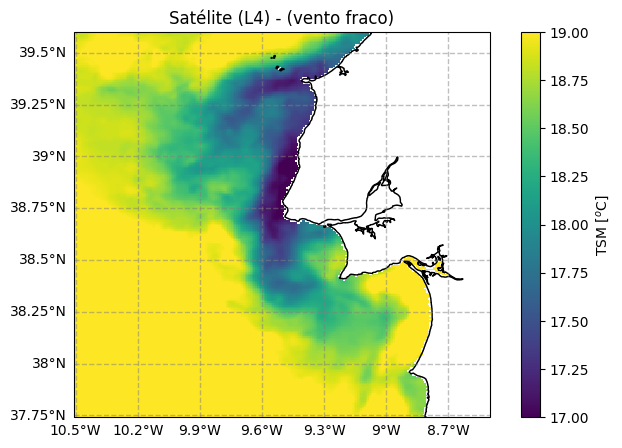

In [ ]:
ds2plt = sst_ds_vc; tit = 'vento fraco'
# ds2plt = sst_ds_vf; tit = 'vento forte'

# da = ds2plt.thetao
da = ds2plt.analysed_sst - 273.15

fig = plt.figure(figsize=(10, 5)) # Define the figure and specify size
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree()) # Specify plot area & projection
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
gl.top_labels = False
gl.right_labels = False
ax.set_title(f'Satélite (L4) - ({tit})',fontsize=12) # (f'Sea surface temperature,{str(da.time[0].values)[:-13]}') # Set figure title
coast = cf.GSHHSFeature(scale='f')                           #... it takes time to download and make the first plot...
ax.add_feature(coast)
# ax.coastlines(color='black') # Add coastlines ... a bit too coarse...
im = plt.pcolormesh(da.lon, da.lat, da[:,:],vmin=17,vmax=19) #,cmap='jet') # Plot the data
cbar = plt.colorbar(im,fraction=0.045, pad=0.04) # Specify the colourbar
cbar.set_label('TSM [$^{o}$C]') # Define the colourbar label

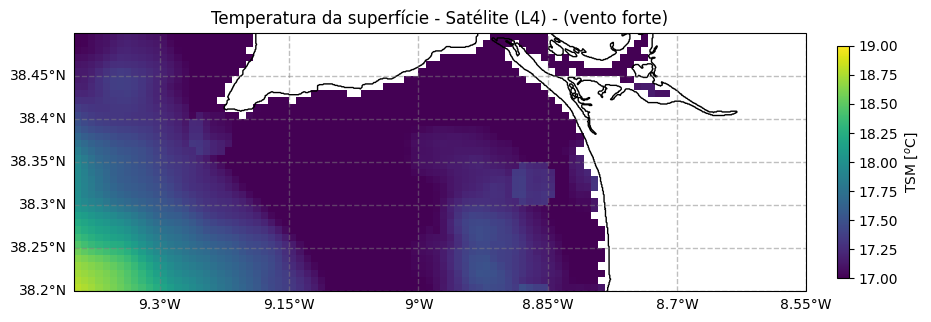

In [ ]:
ds2plt = sst_ds_vc.sel(lon=slice(-9.4,-8.55), lat=slice(38.2,38.5)); tit = 'vento fraco'
ds2plt = sst_ds_vf.sel(lon=slice(-9.4,-8.55), lat=slice(38.2,38.5)); tit = 'vento forte'

da = ds2plt.analysed_sst - 273.15

fig = plt.figure(figsize=(10, 5)) # Define the figure and specify size
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree()) # Specify plot area & projection
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--') # Add lat/lon grid
gl.top_labels = False
gl.right_labels = False
ax.set_title(f'Temperatura da superfície - Satélite (L4) - ({tit})',fontsize=12) # (f'Sea surface temperature,{str(da.time[0].values)[:-13]}') # Set figure title
coast = cf.GSHHSFeature(scale='f')                           #... it takes time to download and make the first plot...
ax.add_feature(coast)
# ax.coastlines(color='black') # Add coastlines ... a bit too coarse...
im = plt.pcolormesh(da.lon, da.lat, da[:,:],vmin=17,vmax=19) #,cmap='jet') # Plot the data
cbar = plt.colorbar(im,fraction=0.015, pad=0.04) # Specify the colourbar
cbar.set_label('TSM [$^{o}$C]') # Define the colourbar label

# MARETEC

http://thredds.maretec.org/thredds/maretecCatalog.html

http://thredds.maretec.org/thredds/catalog/MOHID_WATER/LISOCEAN_0.003DEG_50L_3H/FORECAST/catalog.html

2022080100.nc ... 2023060900.nc

In [ ]:
ds = xr.open_dataset('http://thredds.maretec.org/thredds/dodsC/portugal/MyCOAST_V1_IST_MOHID_portugal_03hr_2022070100_PR')

ValueError: ignored

In [ ]:
!wget -O mycoast_03hr.nc 'http://thredds.maretec.org/thredds/ncss/portugal/MyCOAST_V1_IST_MOHID_portugal_03hr_2022070100_PR.ncml?var=water_level&var=uo&var=vo&north=40&west=-10.5&east=-8.4&south=37.7&disableProjSubset=on&horizStride=1&time_start=2022-06-30T00%3A00%3A00Z&time_end=2022-07-01T00%3A00%3A00Z&timeStride=1&vertCoord=&accept=netcdf'

--2023-06-11 21:35:09--  http://thredds.maretec.org/thredds/ncss/portugal/MyCOAST_V1_IST_MOHID_portugal_03hr_2022070100_PR.ncml?var=water_level&var=uo&var=vo&north=40&west=-10.5&east=-8.4&south=37.7&disableProjSubset=on&horizStride=1&time_start=2022-06-30T00%3A00%3A00Z&time_end=2022-07-01T00%3A00%3A00Z&timeStride=1&vertCoord=&accept=netcdf
Resolving thredds.maretec.org (thredds.maretec.org)... 193.136.129.229
Connecting to thredds.maretec.org (thredds.maretec.org)|193.136.129.229|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/x-netcdf]
Saving to: ‘mycoast_03hr.nc’

mycoast_03hr.nc         [       <=>          ]   4.87M  3.53MB/s    in 1.4s    

2023-06-11 21:35:12 (3.53 MB/s) - ‘mycoast_03hr.nc’ saved [5108004]



In [ ]:
!ls -l

total 5000
drwx------ 5 root root    4096 Jun 11 21:24 drive
-rw-r--r-- 1 root root 5108004 Jun 11 21:35 mycoast_03hr.nc
drwxr-xr-x 1 root root    4096 Jun  8 18:18 sample_data


In [ ]:
myc = xr.open_dataset('mycoast_03hr.nc')
myc

<xarray.Dataset>
Dimensions:      (time: 9, latitude: 39, longitude: 36, depth: 50)
Coordinates:
  * time         (time) datetime64[ns] 2022-06-30 ... 2022-07-01
  * latitude     (latitude) float32 37.71 37.77 37.83 ... 39.87 39.93 39.99
  * longitude    (longitude) float32 -10.47 -10.41 -10.35 ... -8.49 -8.43 -8.37
  * depth        (depth) float32 5.366e+03 5.106e+03 4.78e+03 ... -0.1324 -1.414
Data variables:
    water_level  (time, latitude, longitude) float32 ...
    uo           (time, depth, latitude, longitude) float32 ...
    vo           (time, depth, latitude, longitude) float32 ...
Attributes:
    Conventions:         CF-1.0
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  37.709999084472656
    geospatial_lat_max:  39.98999786376953
    geospatial_lon_min:  -10.470001220703125
    geospatial_lon_max:  -8.370003700256348

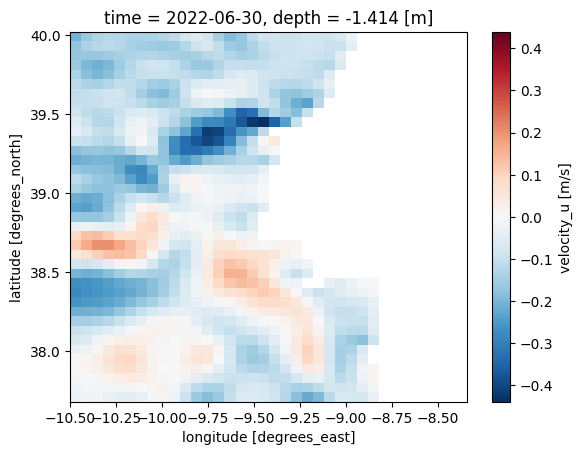

In [ ]:
myc.isel(time=0,depth=49).uo.plot()

## LUSITANIA

In [ ]:
ds = xr.open_dataset('http://thredds.maretec.org/thredds/dodsC/MOHID_WATER/LUSITANIA_0.08DEG_50L_3H/FORECAST/2022061000.nc')

ImportError: ignored

In [ ]:
!wget -O lusit_2022061000.nc 'http://thredds.maretec.org/thredds/ncss/MOHID_WATER/LUSITANIA_0.08DEG_50L_3H/FORECAST/2022061000.nc?var=ssh&var=salinity&var=temperature&var=u&var=v&north=39.6&west=-10.5&east=-8.5&south=37.75&disableProjSubset=on&horizStride=1&time_start=2022-06-10T00%3A00%3A00Z&time_end=2022-06-11T00%3A00%3A00Z&timeStride=1&vertCoord=&accept=netcdf'

--2023-06-11 22:00:18--  http://thredds.maretec.org/thredds/ncss/MOHID_WATER/LUSITANIA_0.08DEG_50L_3H/FORECAST/2022061000.nc?var=ssh&var=salinity&var=temperature&var=u&var=v&north=39.6&west=-10.5&east=-8.5&south=37.75&disableProjSubset=on&horizStride=1&time_start=2022-06-10T00%3A00%3A00Z&time_end=2022-06-11T00%3A00%3A00Z&timeStride=1&vertCoord=&accept=netcdf
Resolving thredds.maretec.org (thredds.maretec.org)... 193.136.129.229
Connecting to thredds.maretec.org (thredds.maretec.org)|193.136.129.229|:80... connected.
HTTP request sent, awaiting response... 200 
Length: unspecified [application/x-netcdf]
Saving to: ‘lusit_2022061000.nc’

lusit_2022061000.nc     [        <=>         ]   4.31M  2.90MB/s    in 1.5s    

2023-06-11 22:00:24 (2.90 MB/s) - ‘lusit_2022061000.nc’ saved [4520224]



In [ ]:
ds = xr.open_dataset('lusit_2022061000.nc')
ds

<xarray.Dataset>
Dimensions:      (time: 9, lat: 24, lon: 26, depth: 50)
Coordinates:
  * time         (time) datetime64[ns] 2022-06-10 ... 2022-06-11
  * lat          (lat) float32 37.79 37.87 37.95 38.03 ... 39.47 39.55 39.63
  * lon          (lon) float32 -10.51 -10.43 -10.35 -10.27 ... -8.67 -8.59 -8.51
  * depth        (depth) float32 5.61e+03 5.176e+03 4.786e+03 ... -0.1867 -1.476
Data variables:
    ssh          (time, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    temperature  (time, depth, lat, lon) float32 ...
    u            (time, depth, lat, lon) float32 ...
    v            (time, depth, lat, lon) float32 ...
Attributes: (12/18)
    Title:               - Forecast for 2022-06-10 to 2022-06-11
    Conventions:         CF-1.6
    netcdf_version_id:   4.4.1
    history:             2018/11/12 14:45:24 Maretec Netcdf creation
    date:                2018
    source:              ConvertTonetcdf - Mohid tools
    ...                  ...
    contact:             joao.sobrinho@tecnico.ulisboa.pt
    field_type:          mean
    bulletin_date:       2018-11-12 00:00:00
    bulletin_type:       operational
    comment:             Maretec operational modelling product
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...

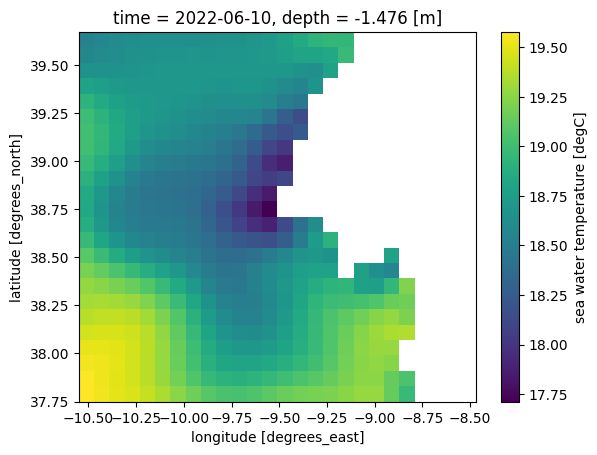

In [ ]:
ds.isel(time=0,depth=49).temperature.plot()